In [1]:
from hazm import *
import pandas as pd
import re
import matplotlib.pyplot as plt
import copy                                                      


trainAddress = "books_train.csv"
testAddress = "books_test.csv"
swAddress = "sw.csv"

title = "title"
desc = "description"
cat = "categories"


jamee = "جامعه‌شناسی"
dastanKoutah = "داستان کوتاه"
koliyatEslam = "کلیات اسلام"
nojavan = "داستان کودک و نوجوانان"
roman = "رمان"
kasb = "مدیریت و کسب و کار"
categsList = [dastanKoutah, koliyatEslam, roman, nojavan, jamee, kasb]

IDs = {jamee : 0, dastanKoutah : 1, koliyatEslam : 2, roman : 3, nojavan : 4, kasb : 5}

id_jamee = 1
id_dastanKoutah = 2
id_koliyatEslam = 3
id_nojavan = 4
id_roman = 5
id_kasb = 6


smooth = False

digitNum = 4

In [2]:
def loadData(address):
    df = pd.read_csv(address)
    return df
train = loadData(trainAddress)
test = loadData(testAddress)

In [3]:
train.head()

,title,description,categories
0,ساختار نظریه‌های جامعه‌شناسی ایران,«ساختار نظریه‌های جامعه‌شناسی ایران» نوشته ابو...,جامعه‌شناسی
1,جامعه و فرهنگ کانادا,«جامعه و فرهنگ کانادا» از مجموعه کتاب‌های «جام...,جامعه‌شناسی
2,پرسش از موعود,پرسش‌های مختلفی درباره زندگی و شخصیت امام مهدی...,کلیات اسلام
3,موج، دریا,«موج دریا» به قلم مهری ماهوتی (-۱۳۴۰) و تصویرگ...,داستان کودک و نوجوانان
4,پرسش از غرب,«پرسش از غرب» به قلم دکتر اسماعیل شفیعی سروستا...,جامعه‌شناسی


In [4]:
test.head()

,title,description,categories
0,کآشوب,«کآشوب (بیست و سه روایت از روضه‌هایی که زندگی ...,داستان کوتاه
1,داستان‌های برق‌آسا,«داستان‌های برق‌آسا» نام مجموعه داستان‌هایی به...,داستان کوتاه
2,بحثی درباره مرجعیت و روحانیت,مجموعه مقالات «بحثی درباره مرجعیت و روحانیت» ش...,کلیات اسلام
3,قلعه‌ی حیوانات,«قلعه‌ی حیوانات» جورج اورول، درباره گروهی از ح...,رمان
4,قصه ما مثل شد (۱),«قصه ما مثل شد» یک مجموعه کتاب ۵ جلدی است که د...,داستان کودک و نوجوانان


In [5]:
def RemovePunct(df):
    for ind in df.index:
        df[title][ind] = re.sub(r'\W', ' ', df[title][ind])
        df[desc][ind] = re.sub(r'\W', ' ', df[desc][ind])
RemovePunct(train)
RemovePunct(test)

In [6]:
train.head()

,title,description,categories
0,ساختار نظریه های جامعه شناسی ایران,ساختار نظریه های جامعه شناسی ایران نوشته ابو...,جامعه‌شناسی
1,جامعه و فرهنگ کانادا,جامعه و فرهنگ کانادا از مجموعه کتاب های جام...,جامعه‌شناسی
2,پرسش از موعود,پرسش های مختلفی درباره زندگی و شخصیت امام مهدی...,کلیات اسلام
3,موج دریا,موج دریا به قلم مهری ماهوتی ۱۳۴۰ و تصویرگ...,داستان کودک و نوجوانان
4,پرسش از غرب,پرسش از غرب به قلم دکتر اسماعیل شفیعی سروستا...,جامعه‌شناسی


In [7]:
test.head()

,title,description,categories
0,کآشوب,کآشوب بیست و سه روایت از روضه هایی که زندگی ...,داستان کوتاه
1,داستان های برق آسا,داستان های برق آسا نام مجموعه داستان هایی به...,داستان کوتاه
2,بحثی درباره مرجعیت و روحانیت,مجموعه مقالات بحثی درباره مرجعیت و روحانیت ش...,کلیات اسلام
3,قلعه ی حیوانات,قلعه ی حیوانات جورج اورول درباره گروهی از ح...,رمان
4,قصه ما مثل شد ۱,قصه ما مثل شد یک مجموعه کتاب ۵ جلدی است که د...,داستان کودک و نوجوانان


In [8]:
def wordTokenize(df):
    for ind in df.index:
        df[title][ind] = word_tokenize(df[title][ind])
        df[desc][ind] = word_tokenize(df[desc][ind])

wordTokenize(train)        
wordTokenize(test)

In [9]:
train.head()

,title,description,categories
0,"[ساختار, نظریه, های, جامعه, شناسی, ایران]","[ساختار, نظریه, های, جامعه, شناسی, ایران, نوشت...",جامعه‌شناسی
1,"[جامعه, و, فرهنگ, کانادا]","[جامعه, و, فرهنگ, کانادا, از, مجموعه, کتاب, ها...",جامعه‌شناسی
2,"[پرسش, از, موعود]","[پرسش, های, مختلفی, درباره, زندگی, و, شخصیت, ا...",کلیات اسلام
3,"[موج, دریا]","[موج, دریا, به, قلم, مهری, ماهوتی, ۱۳۴۰, و, تص...",داستان کودک و نوجوانان
4,"[پرسش, از, غرب]","[پرسش, از, غرب, به, قلم, دکتر, اسماعیل, شفیعی,...",جامعه‌شناسی


In [10]:
test.head()

,title,description,categories
0,[کآشوب],"[کآشوب, بیست, و, سه, روایت, از, روضه, هایی, که...",داستان کوتاه
1,"[داستان, های, برق, آسا]","[داستان, های, برق, آسا, نام, مجموعه, داستان, ه...",داستان کوتاه
2,"[بحثی, درباره, مرجعیت, و, روحانیت]","[مجموعه, مقالات, بحثی, درباره, مرجعیت, و, روحا...",کلیات اسلام
3,"[قلعه, ی, حیوانات]","[قلعه, ی, حیوانات, جورج, اورول, درباره, گروهی,...",رمان
4,"[قصه, ما, مثل, شد, ۱]","[قصه, ما, مثل, شد, یک, مجموعه, کتاب, ۵, جلدی, ...",داستان کودک و نوجوانان


In [11]:
def loadSW():
    sw = pd.read_csv(swAddress)
    sw = sw['word'].tolist()
    return sw

def removeSW_col(df, col, sw):
    for ind in df.index:
        case = df[col][ind]
        filtered = []
        for word in case:
            if word not in sw:
                filtered.append(word)
        df[col][ind] = filtered
    
def removeSW(df):
    sw = loadSW()
    removeSW_col(df, title, sw)
    removeSW_col(df, desc, sw)

removeSW(train) 
removeSW(test) 

In [12]:
train.head()

,title,description,categories
0,"[ساختار, نظریه, جامعه, شناسی, ایران]","[ساختار, نظریه, جامعه, شناسی, ایران, نوشته, اب...",جامعه‌شناسی
1,"[جامعه, فرهنگ, کانادا]","[جامعه, فرهنگ, کانادا, مجموعه, کتاب, جامعه, فر...",جامعه‌شناسی
2,"[پرسش, موعود]","[پرسش, مختلفی, زندگی, شخصیت, امام, مهدی, عج, ا...",کلیات اسلام
3,"[موج, دریا]","[موج, دریا, قلم, مهری, ماهوتی, ۱۳۴۰, تصویرگری,...",داستان کودک و نوجوانان
4,"[پرسش, غرب]","[پرسش, غرب, قلم, دکتر, اسماعیل, شفیعی, سروستان...",جامعه‌شناسی


In [13]:
test.head()

,title,description,categories
0,[کآشوب],"[کآشوب, بیست, روایت, روضه, هایی, زندگی, کنیم, ...",داستان کوتاه
1,"[داستان, برق, آسا]","[داستان, برق, آسا, مجموعه, داستان, هایی, گردآو...",داستان کوتاه
2,"[بحثی, مرجعیت, روحانیت]","[مجموعه, مقالات, بحثی, مرجعیت, روحانیت, شامل, ...",کلیات اسلام
3,"[قلعه, حیوانات]","[قلعه, حیوانات, جورج, اورول, گروهی, حیوانات, ا...",رمان
4,"[قصه, ۱]","[قصه, مجموعه, کتاب, ۵, جلدی, محمد, میرکیانی, ۱...",داستان کودک و نوجوانان


In [14]:
def removeNum_col(df, col):
    for ind in df.index:
        case = df[col][ind]
        filtered = []
        for word in case:
            result = any(chr.isdigit() for chr in word)
            if not result:
                filtered.append(word)
        df[col][ind] = filtered
    
def removeNum(df):
    removeNum_col(df, title)
    removeNum_col(df, desc)

removeNum(train) 
removeNum(test) 

In [15]:
train.head()

,title,description,categories
0,"[ساختار, نظریه, جامعه, شناسی, ایران]","[ساختار, نظریه, جامعه, شناسی, ایران, نوشته, اب...",جامعه‌شناسی
1,"[جامعه, فرهنگ, کانادا]","[جامعه, فرهنگ, کانادا, مجموعه, کتاب, جامعه, فر...",جامعه‌شناسی
2,"[پرسش, موعود]","[پرسش, مختلفی, زندگی, شخصیت, امام, مهدی, عج, ا...",کلیات اسلام
3,"[موج, دریا]","[موج, دریا, قلم, مهری, ماهوتی, تصویرگری, عاطفه...",داستان کودک و نوجوانان
4,"[پرسش, غرب]","[پرسش, غرب, قلم, دکتر, اسماعیل, شفیعی, سروستان...",جامعه‌شناسی


In [16]:
test.head()

,title,description,categories
0,[کآشوب],"[کآشوب, بیست, روایت, روضه, هایی, زندگی, کنیم, ...",داستان کوتاه
1,"[داستان, برق, آسا]","[داستان, برق, آسا, مجموعه, داستان, هایی, گردآو...",داستان کوتاه
2,"[بحثی, مرجعیت, روحانیت]","[مجموعه, مقالات, بحثی, مرجعیت, روحانیت, شامل, ...",کلیات اسلام
3,"[قلعه, حیوانات]","[قلعه, حیوانات, جورج, اورول, گروهی, حیوانات, ا...",رمان
4,[قصه],"[قصه, مجموعه, کتاب, جلدی, محمد, میرکیانی, مجمو...",داستان کودک و نوجوانان


In [17]:
def RisheYabi_col(df, col):
    risheYaab = Lemmatizer()
    for ind in df.index:
        case = df[col][ind]    
        filtered = []
        for word in case:
            word = risheYaab.lemmatize(word)
            filtered.append(word)
        df[col][ind] = filtered
        

def RisheYabi(df):
    RisheYabi_col(df, title)
    RisheYabi_col(df, desc)


RisheYabi(train)
RisheYabi(test)

In [18]:
train.head()

,title,description,categories
0,"[ساختار, نظریه, جامعه, شناخت#شناس, ایران]","[ساختار, نظریه, جامعه, شناخت#شناس, ایران, نوشت...",جامعه‌شناسی
1,"[جامعه, فرهنگ, کانادا]","[جامعه, فرهنگ, کانادا, مجموعه, کتاب, جامعه, فر...",جامعه‌شناسی
2,"[پرسش, موعود]","[پرسش, مختلف, زندگی, شخصیت, امام, مهدی, عج, اذ...",کلیات اسلام
3,"[موج, دریا]","[موج, دریا, قلم, مهر, ماهوت, تصویرگر, عاطفه, م...",داستان کودک و نوجوانان
4,"[پرسش, غرب]","[پرسش, غرب, قلم, دکتر, اسماعیل, شفیع, سروستان,...",جامعه‌شناسی


In [19]:
test.head()

,title,description,categories
0,[کآشوب],"[کآشوب, بیست, روایت, روضه, هایی, زندگی, کرد#کن...",داستان کوتاه
1,"[داستان, برق, آسا]","[داستان, برق, آسا, مجموعه, داستان, هایی, گردآو...",داستان کوتاه
2,"[بحث, مرجعیت, روحانیت]","[مجموعه, مقالات, بحث, مرجعیت, روحانیت, شامل, م...",کلیات اسلام
3,"[قلعه, حیوانات]","[قلعه, حیوانات, جورج, اورول, گروهی, حیوانات, ا...",رمان
4,[قصه],"[قصه, مجموعه, کتاب, جلد, محمد, میرکیانی, مجموع...",داستان کودک و نوجوانان


In [20]:
def setBAG(df ,bag, col):
    for ind in df.index:
        categ = df[cat][ind]
        words = df[col][ind]
        for word in words:
            if word not in bag[categ].keys():
                bag[categ][word] = 1
            else:
                bag[categ][word] += 1
                



BAG_title = {jamee : {}, dastanKoutah : {}, koliyatEslam : {}, roman : {}, nojavan : {}, kasb : {}}
BAG_desc = {jamee : {}, dastanKoutah : {}, koliyatEslam : {}, roman : {}, nojavan : {}, kasb : {}}
    
setBAG(train, BAG_title, title)
setBAG(train, BAG_desc, desc)

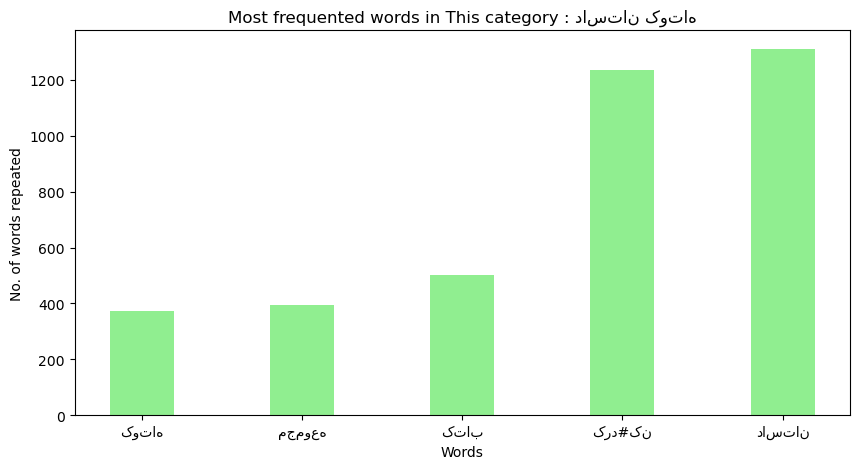

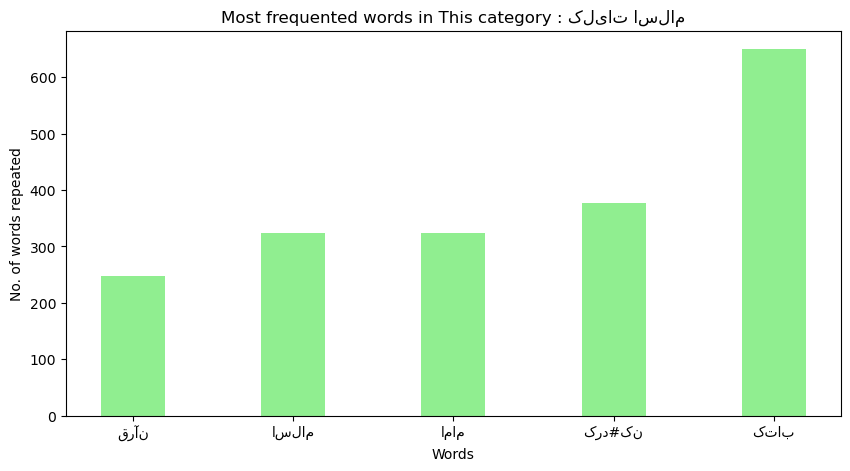

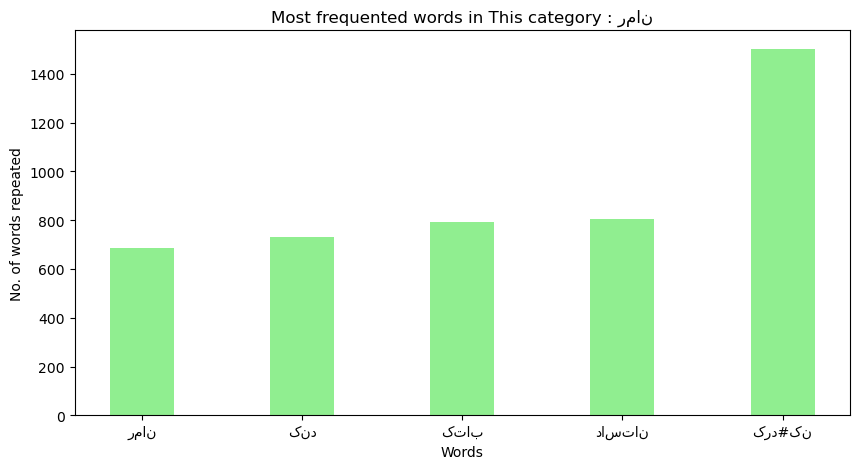

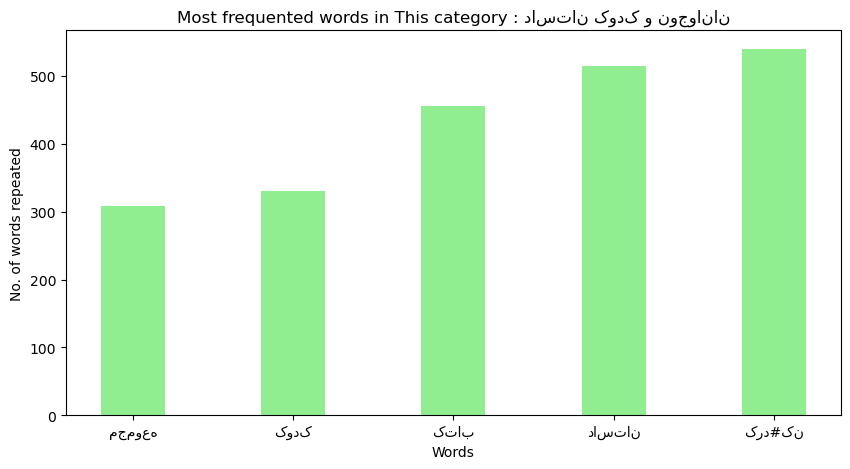

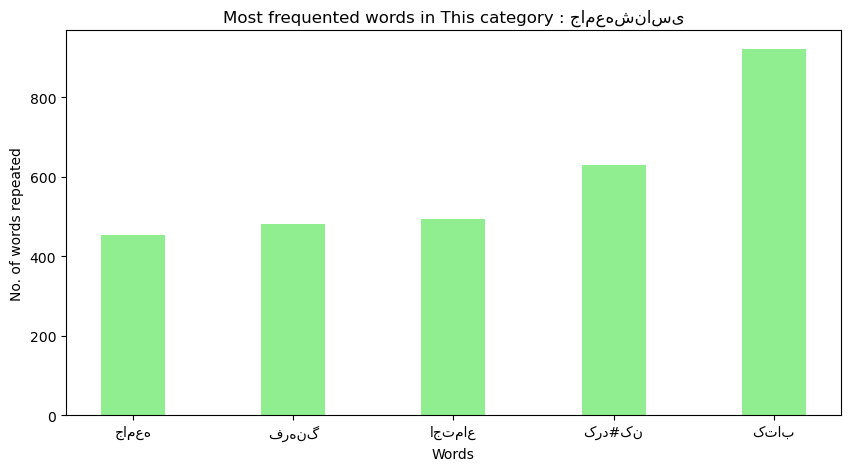

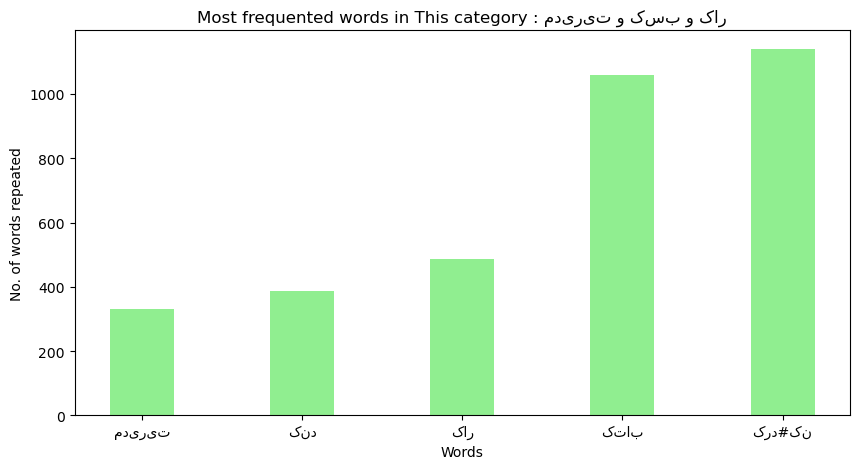

In [21]:
def barPlot(Bag, categ):
    LastDic = copy.deepcopy(Bag[categ])

    top = sorted(LastDic.items(), key = lambda kv:(kv[1], kv[0]))
    top = top[-5:]
    X = []
    Y = []
    for tople in top:
        X.append(tople[0])
        Y.append(tople[1])
        
    fig = plt.figure(figsize = (10, 5))
     
    plt.bar(X, Y, color ='lightgreen', width = 0.4)
     
    plt.xlabel("Words")
    plt.ylabel("No. of words repeated")
    plt.title("Most frequented words in This category : " + categ)
    plt.show()


for categ in categsList:
    barPlot(BAG_desc, categ)

In [22]:
def calcProbCategs(df, CategProb):
    allSampleNum = len(train.index)
    for ind in df.index:
        categ = df[cat][ind]
        CategProb[categ] += 1
    for i in CategProb.keys():
        CategProb[i] /= allSampleNum
        

def countNewWords(bag, categ, sentence):
    numNewWords = 0
    for word in sentence:
        if word not in bag[categ].keys():
            numNewWords +=1
    return numNewWords


def calcProbWordInCat(bag, categ, word, denom):
    face = int(smooth)
    if word in bag[categ].keys():
        face += bag[categ][word]
    probWord = face / (denom + 1)
    return probWord
    

def calcProbSentInCat(bag, categ, sentence):
    ans = 1
    numNewWords = countNewWords(bag, categ, sentence)
    denom = numNewWords + len(bag[categ])
    for word in sentence:
        probWordInCat = calcProbWordInCat(bag, categ, word, denom)
        ans *= probWordInCat
    return ans
        
        
def calcProbCatInSent(bag, categ, sentence, CategProb):
    probSentenceIncat = calcProbSentInCat(bag, categ, sentence)
    probCateg = CategProb[categ]
    ProbCatInsent = probSentenceIncat * probCateg
    return ProbCatInsent
    
def returnCatagOfSent(BAG_desc, BAG_title, CategProb, desc, title):
    prob = -9999999999999999999999999999
    for categ in categsList:
        probCatInDesc = calcProbCatInSent(BAG_desc, categ, desc, CategProb)
        probCatInTitle = calcProbCatInSent(BAG_title, categ, title, CategProb)        
        probCatInsent = probCatInTitle + 3*probCatInDesc
        if probCatInsent > prob:
            ansCat = categ
            prob = probCatInsent
    return ansCat

CategProb = {jamee : 0, dastanKoutah : 0, koliyatEslam : 0, roman : 0, nojavan : 0, kasb : 0}   
calcProbCategs(train, CategProb)

In [23]:
def PredictTest():
    confusion_mtx = [[0 for i in range(6)] for j in range(6)]
    for ind in test.index:
        ActualCat = test[cat][ind]
        predCat = returnCatagOfSent(BAG_desc, BAG_title, CategProb, test[desc][ind], test[title][ind])
        mtRow = IDs[ActualCat]
        mtCol = IDs[predCat]
        confusion_mtx[mtRow][mtCol] += 1
    return confusion_mtx
        




def SigmaMtxDiag(matrix):
    sigma = 0
    for i in range(len(matrix)):
        sigma += matrix[i][i]
    return sigma



def SigmaMtxCol(mtx, col):
    sigma = 0
    for i in range(len(mtx)):
        sigma += mtx[i][col]
    return sigma    

    
    
def SigmaMtxRow(mtx, row):
    sigma = 0
    for i in range(len(mtx)):
        sigma += mtx[row][i]
    return sigma    
    
    
def ceritera(mtx, categ):
    ID  = IDs[categ]
    CorrectDetected = mtx[ID][ID]
    AllPredicted = SigmaMtxCol(mtx, ID)
    AllActual = SigmaMtxRow(mtx, ID)
    precision = CorrectDetected / AllPredicted *100
    recall = CorrectDetected / AllActual * 100
    F1 = 2 * (precision * recall) / (precision + recall) 
    return precision, recall, F1
    


def evaluatePrediction(Confusion_matrix):
    macroF1 = 0
    Total = len(test.index)
    AllCorDetect = SigmaMtxDiag(Confusion_matrix)
    Accu = AllCorDetect / Total  * 100
    print("𝐴𝑐𝑐𝑢𝑟𝑎𝑐𝑦: %" + str("%.2f" %Accu))
    for categ in categsList:
        precision, recall, F1 = ceritera(Confusion_matrix, categ)
        print("\n")
        print(categ)
        print("𝑃𝑟𝑒𝑐𝑖𝑠𝑖𝑜𝑛: %" + str("%.2f" %precision))
        print("𝑅𝑒𝑐𝑎𝑙𝑙 : %" + str("%.2f" %recall))
        print("F1: %" + str("%.2f" %F1))
        macroF1 += F1
    macroF1 /= 6
    print("\n\n.macroF1: %" + str("%.2f" %macroF1))
    

    
        
Confusion_matrix = PredictTest()
for row in Confusion_matrix:
    print(row)

print("\n")
evaluatePrediction(Confusion_matrix)

[23, 47, 2, 0, 2, 1]
[3, 60, 3, 6, 2, 1]
[3, 41, 29, 2, 0, 0]
[0, 58, 4, 10, 3, 0]
[1, 39, 1, 1, 33, 0]
[3, 45, 0, 0, 0, 27]


𝐴𝑐𝑐𝑢𝑟𝑎𝑐𝑦: %40.44


داستان کوتاه
𝑃𝑟𝑒𝑐𝑖𝑠𝑖𝑜𝑛: %20.69
𝑅𝑒𝑐𝑎𝑙𝑙 : %80.00
F1: %32.88


کلیات اسلام
𝑃𝑟𝑒𝑐𝑖𝑠𝑖𝑜𝑛: %74.36
𝑅𝑒𝑐𝑎𝑙𝑙 : %38.67
F1: %50.88


رمان
𝑃𝑟𝑒𝑐𝑖𝑠𝑖𝑜𝑛: %52.63
𝑅𝑒𝑐𝑎𝑙𝑙 : %13.33
F1: %21.28


داستان کودک و نوجوانان
𝑃𝑟𝑒𝑐𝑖𝑠𝑖𝑜𝑛: %82.50
𝑅𝑒𝑐𝑎𝑙𝑙 : %44.00
F1: %57.39


جامعه‌شناسی
𝑃𝑟𝑒𝑐𝑖𝑠𝑖𝑜𝑛: %69.70
𝑅𝑒𝑐𝑎𝑙𝑙 : %30.67
F1: %42.59


مدیریت و کسب و کار
𝑃𝑟𝑒𝑐𝑖𝑠𝑖𝑜𝑛: %93.10
𝑅𝑒𝑐𝑎𝑙𝑙 : %36.00
F1: %51.92


.macroF1: %42.82
